import the libraries

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
import pandas as pd


In [17]:
data = pd.read_csv("/content/sample_data/sample_submission.csv", dtype=np.float32)
data = pd.read_csv("/content/sample_data/test.csv", dtype=np.float32)
data = pd.read_csv("/content/sample_data/train.csv", dtype=np.float32)


In [18]:
data.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41996    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41997    7.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41998    6.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41999    9.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pi

In [5]:
data.dtypes

label       float32
pixel0      float32
pixel1      float32
pixel2      float32
pixel3      float32
             ...   
pixel779    float32
pixel780    float32
pixel781    float32
pixel782    float32
pixel783    float32
Length: 785, dtype: object

In [6]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [7]:
data.duplicated

<bound method DataFrame.duplicated of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
1137    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1138    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1139    9.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1140    2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1141    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      pixel8 

In [8]:
data.shape

(1142, 785)

In [9]:
data.info

<bound method DataFrame.info of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
1137    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1138    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1139    9.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1140    2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1141    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      pixel8  ...  

In [10]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [11]:
data.nunique

<bound method DataFrame.nunique of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
1137    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1138    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1139    9.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1140    2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1141    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      pixel8  ..

In [ ]:
data.describe

<bound method NDFrame.describe of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
4579    8.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4580    5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4581    7.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4582    7.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4583    5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      pixel8  ...

In [12]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

%matplotlib inline

In [13]:
TRAIN_PATH = '/content/sample_data/train.csv'
TEST_PATH = '/content/sample_data/test.csv'
IMG_SIZE = 28
BATCH_SIZE = 512
EPOCHS = 3
FOLDS = 3

In [14]:
import pandas as pd

In [15]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3433,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3434,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3435,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = (train.iloc[:,1:].values).astype('float32')
y = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

In [17]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]], dtype=float32)

In [36]:
try:
    train = pd.read_csv('Data/train.csv')
    test = pd.read_csv('Data/test.csv')
except:
    train = pd.read_csv('/content/sample_data/train.csv')
    test = pd.read_csv('/content/sample_data/test.csv')

In [37]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test = np.array(test)
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
y = train['label']
X = train.drop('label', axis=1)

In [41]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [18]:
X = X.reshape(-1, 28, 28, 1)

In [19]:
import matplotlib.pyplot as plt


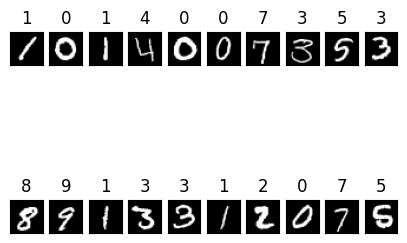

In [20]:
# Figure size
plt.figure(figsize=(5,4))

# Subplot
for i in range(20):
    ax=plt.subplot(2, 10, i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
    plt.title(y[i]);

plt.show()

Build the model

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1 / 255)

In [23]:
train_datagen.fit(X_train)
validation_datagen.fit(X_val)

In [24]:
model = keras.Sequential([
    layers.Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    layers.Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # Convolutional layer 3, 4
    layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),


    # Flatten layer
    layers.Flatten(),
    layers.Dense(512, activation = "relu"),
    layers.Dropout(0.5),

    # Output layer (softmax returns a probability distribution)
    layers.Dense(units=10, activation='linear')
])

In [19]:
 model.compile(optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #'sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

In [20]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=50,
    min_delta=0.001,
    restore_best_weights=True,
)

In [27]:
history = model.fit(
    train_datagen.flow(X_train,y_train, batch_size=BATCH_SIZE),
    validation_data=validation_datagen.flow(X_val, y_val),
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/3
7/7 [==============================] - 77s 10s/step - loss: nan - sparse_categorical_accuracy: 0.1187 - val_loss: nan - val_sparse_categorical_accuracy: 0.1163
Epoch 2/3
7/7 [==============================] - 77s 11s/step - loss: nan - sparse_categorical_accuracy: 0.1012 - val_loss: nan - val_sparse_categorical_accuracy: 0.1163
Epoch 3/3
7/7 [==============================] - 77s 11s/step - loss: nan - sparse_categorical_accuracy: 0.1012 - val_loss: nan - val_sparse_categorical_accuracy: 0.1163


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [7]:
# Open train data provided by kaggle
train_data = pd.read_csv("/content/sample_data/train.csv")
train_data.head()

# Open test data provided by kaggle
test_data = pd.read_csv("/content/sample_data/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Get size of trian and test data and reshape test data
print(train_data.shape)
print(test_data.shape)

test_data = test_data / 255.0
test_data = test_data.values.reshape(-1,28,28,1)

# Drop label column
X = train_data.drop('label', axis=1)
y = train_data['label']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape and normalize the input data
X_train = X_train.values.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1) / 255.0

(42000, 785)
(28000, 784)


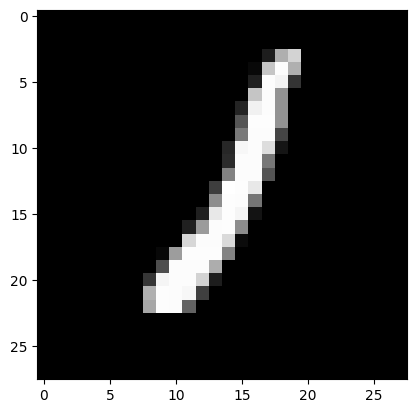

In [9]:
# Display random train image
def show_data(data_sample):
    example_number = random.randrange(100)
    plt.imshow(data_sample[example_number].reshape(28, 28), cmap='gray')

img = X_train.reshape(-1, 28, 28, 1)
show_data(img)

In [10]:
# Convert train vectors and values to binary matrix
y_train = to_categorical(y_train, num_classes=10)

# Create model using CNN with 3 hidden layers
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

In [11]:
# Compile training model with Adam optimizer and cross-entropy loss

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fit the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 49s 45ms/step - loss: 0.4842 - accuracy: 0.8431
Epoch 2/10
1050/1050 [==============================] - 49s 47ms/step - loss: 0.1652 - accuracy: 0.9510
Epoch 3/10
1050/1050 [==============================] - 59s 56ms/step - loss: 0.1293 - accuracy: 0.9629
Epoch 4/10
1050/1050 [==============================] - 47s 45ms/step - loss: 0.1085 - accuracy: 0.9696
Epoch 5/10
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0965 - accuracy: 0.9729
Epoch 6/10
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0841 - accuracy: 0.9759
Epoch 7/10
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0836 - accuracy: 0.9765
Epoch 8/10
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0757 - accuracy: 0.9782
Epoch 9/10
1050/1050 [==============================] - 47s 44ms/step - loss: 0.0694 - accuracy: 0.9794
Epoch 10/10
1050/1050 [==============================] - 52s 49m

875/875 [==============================] - 14s 15ms/step


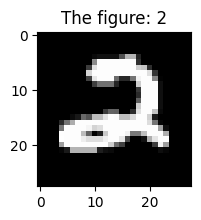

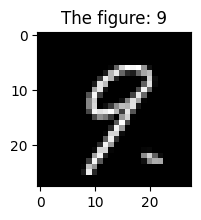

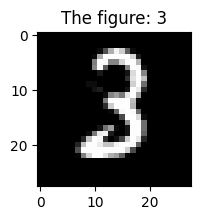

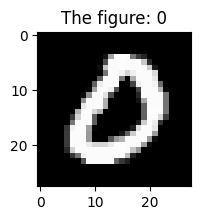

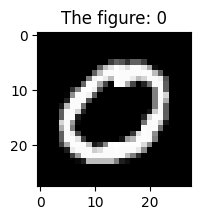

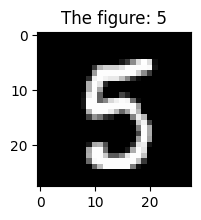

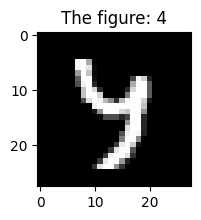

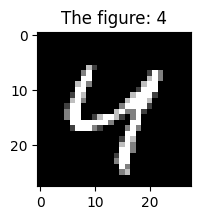

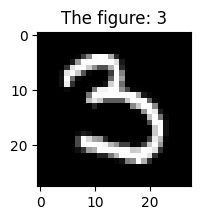

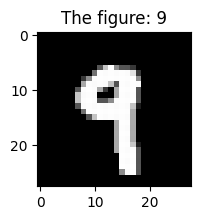

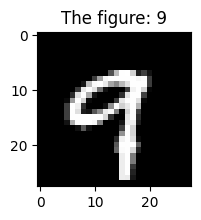

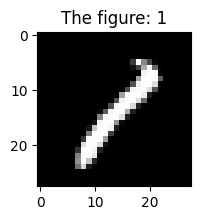

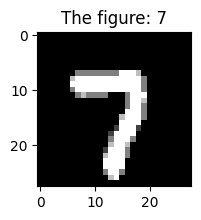

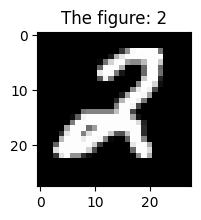

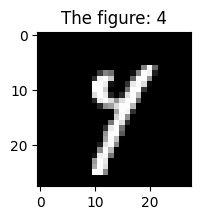

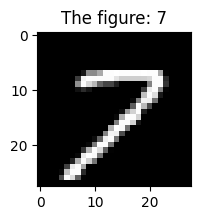

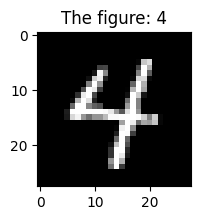

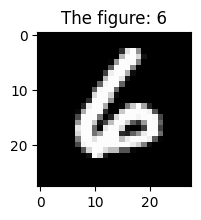

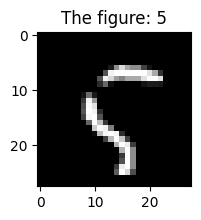

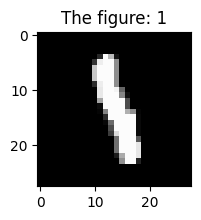

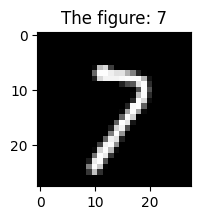

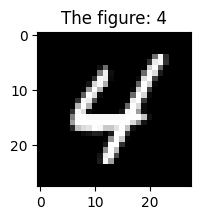

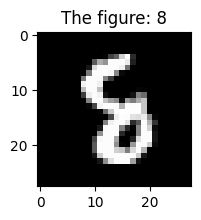

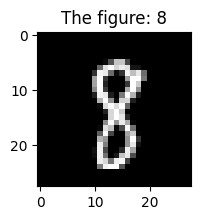

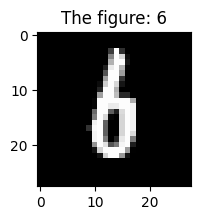

In [12]:
# Predict model
y_pred = model.predict(test_data)

# Make predictions
y_pred = np.argmax(y_pred, axis=1)

for i in range(0,50,2):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'The figure: {y_pred[i]}')
    plt.show()

In [13]:
# Create submission output
predictions = pd.DataFrame({'ImageId': range(1, len(y_pred) + 1), 'Label': y_pred})
predictions.to_csv('/content/sample_data/sample_submission.csv', index=False)